# IMDb Top 250 as rated by regular IMDb voters.

---- _Import Necessary Libraries_ ----

In [1]:
import re
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

---- _Read a HTML page_ ----

In [2]:
url = 'https://www.imdb.com/chart/top/?sort=rk,asc&mode=simple&page=1'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
#print(soup.prettify())

---- _A function to get all the contents of the table_ ----

In [4]:
tables = soup.find_all('tbody')
def get_movie_items(tables):
    for table in tables:
        rows = table.find_all('tr')
        for row in rows:
            items = {}
            items['Title'] = row.select_one(".titleColumn a").get_text()
            items['Year'] = row.select_one(".titleColumn span").get_text()[1:5]
            items['Rating'] = row.select_one(".ratingColumn strong").get_text()
            items['MoreRating'] = row.select_one(".ratingColumn strong")['title']
            yield items

---- _Make a dataframe_ ----

In [6]:
# create a list of movie items
items_list = list(get_movie_items(tables))

# convert the list of dictionaries to a DataFrame
df = pd.DataFrame(items_list)

# display the DataFrame
df.head()

,Title,Year,Rating,MoreRating
0,The Shawshank Redemption,1994,9.2,"9.2 based on 2,724,709 user ratings"
1,The Godfather,1972,9.2,"9.2 based on 1,894,028 user ratings"
2,The Dark Knight,2008,9.0,"9.0 based on 2,697,542 user ratings"
3,The Godfather Part II,1974,9.0,"9.0 based on 1,291,777 user ratings"
4,12 Angry Men,1957,9.0,"9.0 based on 805,724 user ratings"


---- _Understand The Data_ -----

In [7]:
df.shape

(250, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       250 non-null    object
 1   Year        250 non-null    object
 2   Rating      250 non-null    object
 3   MoreRating  250 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB


---- _Clean the Dataset_ ----

In [9]:
df['Year']=df["Year"].astype('int')
df['Rating']=df["Rating"].astype('float')

---- _Visualize the Dataset_ ----

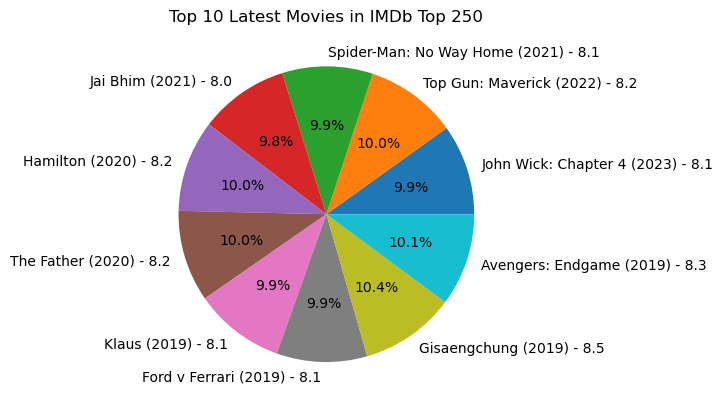

In [29]:
# Latest Movies on top 250 list
top_10=df.sort_values(by="Year",ascending=False).head(10) 

# Create a list of labels that includes both the movie title ,the year and the rating
labels = [f"{title} ({year}) - {rating}" for title, year, rating in zip(top_10['Title'], top_10['Year'], \
                                                                        top_10['Rating'])]

# Create a pie chart of the top 10 movies by year of release
plt.pie(top_10['Rating'], labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Latest Movies in IMDb Top 250')
plt.show()

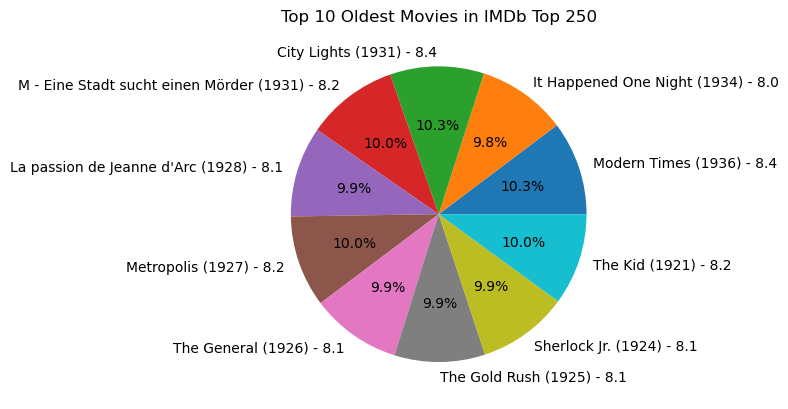

In [30]:
# Oldest Movies still topping the list!
top_10=df.sort_values(by="Year",ascending=False).tail(10) 

# Create a list of labels that includes both the movie title,the year and the rating
labels = [f"{title} ({year}) - {rating}" for title, year, rating in zip(top_10['Title'], top_10['Year'], \
                                                                        top_10['Rating'])]

# Create a pie chart of the top 10 movies by year of release
plt.pie(top_10['Rating'], labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Oldest Movies in IMDb Top 250')
plt.show()

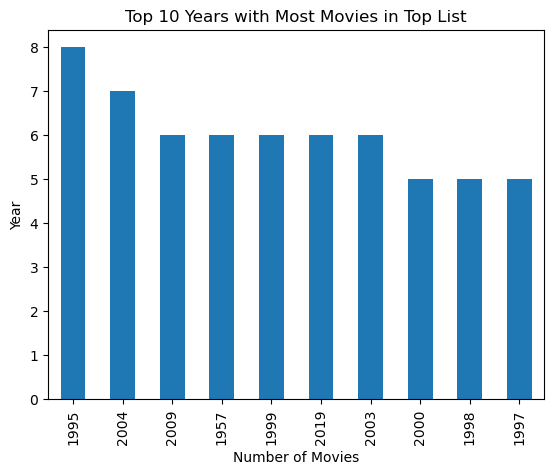

In [9]:
#Top 10 Years with Most Movies in Top List

# group the data by year and count the number of movies in each group
year_counts = df.groupby("Year")["Title"].count()

# sort the Series object in descending order and select the first 10 rows
top_years = year_counts.sort_values(ascending=False).head(10)

# create a bar chart
top_years.plot(kind='bar')

# set the chart title and axis labels
plt.title("Top 10 Years with Most Movies in Top List")
plt.ylabel("Year")
plt.xlabel("Number of Movies")

# display the chart
plt.show()

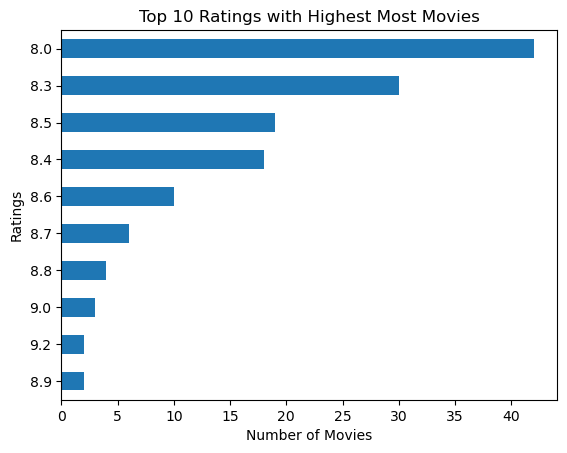

In [10]:
# group the data by Rating and count the number of movies in each group
ratings_counts = df.groupby("Rating")["Title"].count()

# sort the Series object in descending order and select the first 10 rows
top_ratings  = ratings_counts.sort_values(ascending=True).head(10)

# create a bar chart
top_ratings .plot(kind='barh')

# set the chart title and axis labels
plt.title("Top 10 Ratings with Highest Most Movies")
plt.ylabel("Ratings")
plt.xlabel("Number of Movies")

# display the chart
plt.show()